<a href="https://colab.research.google.com/github/akbarjon2000/DataScience/blob/main/Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Read the CSV file and skip lines with parsing errors
file_path = "/Users/akbarjon/Downloads/waste.xlsx"
df = pd.read_excel(file_path, sheet_name="2017년")


In [ ]:
df.head(10)

,i_day,week,i_food_wster_grp,i_food_wst_si,t_pay_type,t_discnt_yn,m_food_wst_cnt,m_food_wst_g,m_food_wst_amt,i_etl_dt,Y,X
0,20170103,화,W6X029,50110,후불,비감면,12,16950,0,2019-07-11 15:34:28,33.489473,126.481764
1,20170103,화,W6X02A,50110,후불,비감면,62,138750,0,2019-07-11 15:34:28,33.476845,126.486417
2,20170103,화,W6X02B,50110,후불,비감면,20,24800,0,2019-07-11 15:34:28,33.491062,126.476087
3,20170103,화,W6X02C,50110,후불,비감면,20,31850,0,2019-07-11 15:34:28,33.487274,126.474518
4,20170103,화,W6X02D,50110,후불,비감면,19,38150,0,2019-07-11 15:34:28,33.487316,126.477164
5,20170103,화,W6X02E,50110,후불,비감면,19,27800,0,2019-07-11 15:34:28,33.488139,126.478150
6,20170103,화,W6X02F,50110,후불,비감면,2,2600,0,2019-07-11 15:34:28,33.486502,126.476995
7,20170103,화,W6X030,50110,후불,비감면,28,62300,0,2019-07-11 15:34:28,33.484446,126.471846
8,20170103,화,W6X031,50110,후불,비감면,51,106050,0,2019-07-11 15:34:28,33.484966,126.471589
9,20170103,화,W6X032,50110,후불,비감면,13,30750,0,2019-07-11 15:34:28,33.485762,126.472522


In [ ]:
import folium
from geopy.geocoders import Nominatim

# Initialize the geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Replace 'Your Location' with the actual address or place name
location = geolocator.geocode("Your Location")

# Get the latitude and longitude
latitude_center = location.latitude
longitude_center = location.longitude
# Create a map centered at a specific location
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)


In [ ]:
# Add markers for each waste bin
for index, row in df.iterrows():
    lat, long = row['Y'], row['X']
    folium.Marker([lat, long]).add_to(m)



In [ ]:
print(m)

In [ ]:
m

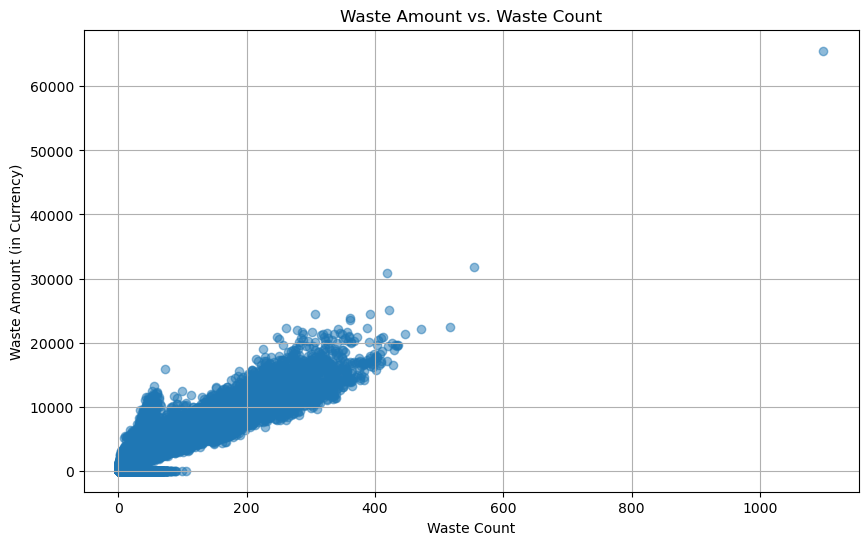

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['m_food_wst_cnt'], df['m_food_wst_amt'], alpha=0.5)
plt.title('Waste Amount vs. Waste Count')
plt.xlabel('Waste Count')
plt.ylabel('Waste Amount (in Currency)')
plt.grid(True)
plt.show()

In [ ]:
df['i_day'] = pd.to_datetime(df['i_day'], format='%Y%m%d')


In [ ]:
weekly_waste_amount = df.groupby(df['i_day'].dt.strftime('%U'))['m_food_wst_amt'].sum().reset_index()

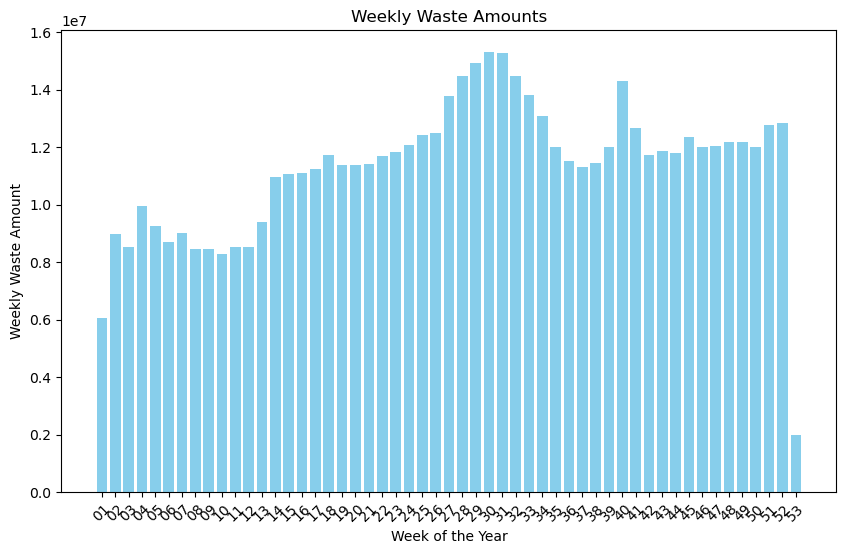

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(weekly_waste_amount['i_day'], weekly_waste_amount['m_food_wst_amt'], color='skyblue')
plt.xlabel('Week of the Year')
plt.ylabel('Weekly Waste Amount')
plt.title('Weekly Waste Amounts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
weekend_df = df[(df['i_day'].dt.dayofweek == 5) | (df['i_day'].dt.dayofweek == 6)]

# Calculate the weekend waste amount by summing the 'WasteAmount' column
weekend_waste_amount = weekend_df['m_food_wst_amt'].sum()

In [ ]:
weekend_waste_amount


176336702

In [ ]:
df

,i_day,week,i_food_wster_grp,i_food_wst_si,t_pay_type,t_discnt_yn,m_food_wst_cnt,m_food_wst_g,m_food_wst_amt,i_etl_dt,Y,X
0,2017-01-03,화,W6X029,50110,후불,비감면,12,16950,0,2019-07-11 15:34:28,33.489473,126.481764
1,2017-01-03,화,W6X02A,50110,후불,비감면,62,138750,0,2019-07-11 15:34:28,33.476845,126.486417
2,2017-01-03,화,W6X02B,50110,후불,비감면,20,24800,0,2019-07-11 15:34:28,33.491062,126.476087
3,2017-01-03,화,W6X02C,50110,후불,비감면,20,31850,0,2019-07-11 15:34:28,33.487274,126.474518
4,2017-01-03,화,W6X02D,50110,후불,비감면,19,38150,0,2019-07-11 15:34:28,33.487316,126.477164
...,...,...,...,...,...,...,...,...,...,...,...,...
404472,2017-12-31,일,W6XC47,50110,선불,비감면,28,62250,1859,2019-07-11 15:34:28,33.491547,126.480361
404473,2017-12-31,일,W6XC48,50110,선불,비감면,5,5750,171,2019-07-11 15:34:28,33.480313,126.459169
404474,2017-12-31,일,W6XC49,50110,선불,비감면,6,8350,249,2019-07-11 15:34:28,33.489961,126.458536
404475,2017-12-31,일,W6XC50,50110,선불,비감면,9,11200,334,2019-07-11 15:34:28,33.489961,126.458536


In [ ]:
# Group by 'i_food_wst_si' (location) and calculate the total waste amount for each location
location_waste_amount = df.groupby('i_food_wst_si')['m_food_wst_amt'].sum().reset_index()

# Optionally, you can sort the locations by waste amount in descending order
location_waste_amount = location_waste_amount.sort_values(by='m_food_wst_amt', ascending=False)


In [ ]:
location_waste_amount

,i_food_wst_si,m_food_wst_amt
0,50110,599137144


In [ ]:
df

,i_day,week,i_food_wster_grp,i_food_wst_si,t_pay_type,t_discnt_yn,m_food_wst_cnt,m_food_wst_g,m_food_wst_amt,i_etl_dt,Y,X
0,2017-01-03,화,W6X029,50110,후불,비감면,12,16950,0,2019-07-11 15:34:28,33.489473,126.481764
1,2017-01-03,화,W6X02A,50110,후불,비감면,62,138750,0,2019-07-11 15:34:28,33.476845,126.486417
2,2017-01-03,화,W6X02B,50110,후불,비감면,20,24800,0,2019-07-11 15:34:28,33.491062,126.476087
3,2017-01-03,화,W6X02C,50110,후불,비감면,20,31850,0,2019-07-11 15:34:28,33.487274,126.474518
4,2017-01-03,화,W6X02D,50110,후불,비감면,19,38150,0,2019-07-11 15:34:28,33.487316,126.477164
...,...,...,...,...,...,...,...,...,...,...,...,...
404472,2017-12-31,일,W6XC47,50110,선불,비감면,28,62250,1859,2019-07-11 15:34:28,33.491547,126.480361
404473,2017-12-31,일,W6XC48,50110,선불,비감면,5,5750,171,2019-07-11 15:34:28,33.480313,126.459169
404474,2017-12-31,일,W6XC49,50110,선불,비감면,6,8350,249,2019-07-11 15:34:28,33.489961,126.458536
404475,2017-12-31,일,W6XC50,50110,선불,비감면,9,11200,334,2019-07-11 15:34:28,33.489961,126.458536


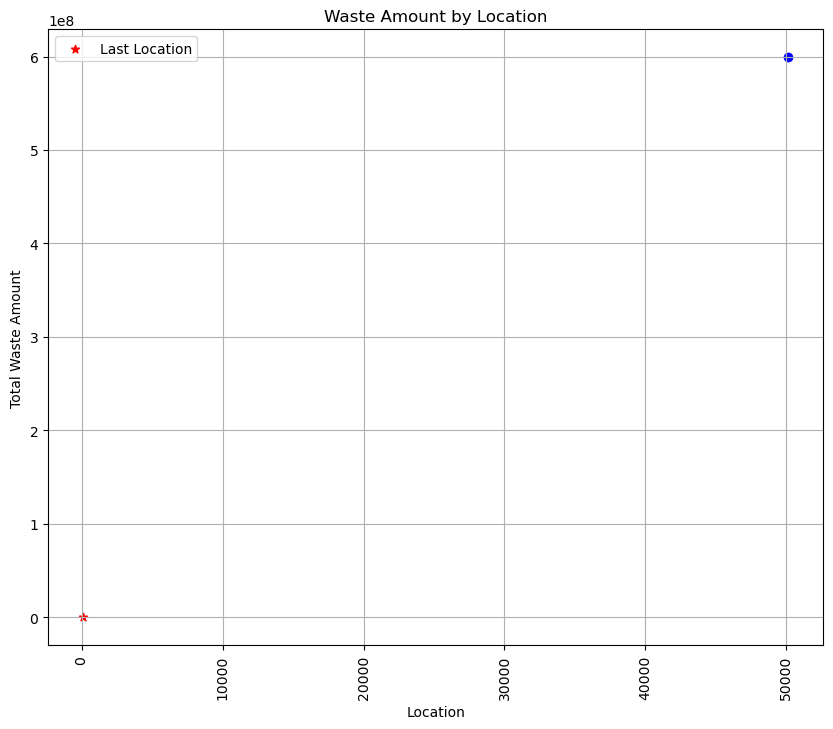

In [ ]:
location_waste_data = df[['i_food_wst_si', 'm_food_wst_amt']]

# Extract the last 'X' and 'Y' rows as latitude and longitude
latitude = df.iloc[-1]['Y']
longitude = df.iloc[-1]['X']

# Group by 'i_food_wst_si' (location) and calculate the total waste amount for each location
location_waste_amount = location_waste_data.groupby('i_food_wst_si')['m_food_wst_amt'].sum().reset_index()

# Create a scatter plot to visualize the waste amounts on the map
plt.figure(figsize=(10, 8))
plt.scatter(location_waste_amount['i_food_wst_si'], location_waste_amount['m_food_wst_amt'], c='blue', marker='o')
plt.xlabel('Location')
plt.ylabel('Total Waste Amount')
plt.title('Waste Amount by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

# Plot the last latitude and longitude as a marker
plt.scatter(longitude, latitude, c='red', marker='*', label='Last Location')
plt.legend()

plt.show()